### Курсовая по Алгоритмам анализа данных

#### The InClass Prediction Competition: "Choose proper tutors for math exam"

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
TRAIN_DATASET_PATH = 'Final course project May/train.csv'
TEST_DATASET_PATH = 'Final course project May/test.csv'

In [5]:
train = pd.read_csv(TRAIN_DATASET_PATH)
test_kaggle = pd.read_csv(TEST_DATASET_PATH)

In [6]:
y = train['choose']

In [7]:
X = train.drop(columns = 'choose', axis = 1)

In [8]:
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
clf = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
import sklearn.metrics as metrics

In [21]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

In [22]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

In [24]:
print('AUC: {}'.format(metrics.auc(fpr, tpr)))

AUC: 0.8627378787878788


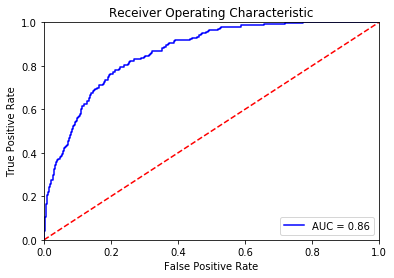

In [25]:
# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC: 0.8627378787878788


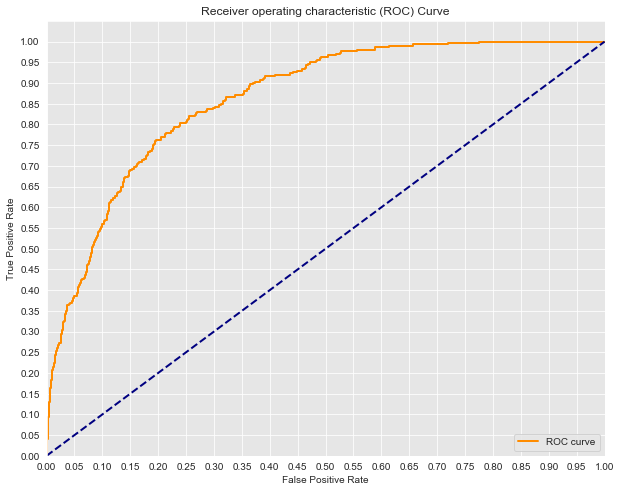

In [31]:
# Method II 
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(metrics.auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()